# Week 2: Portfolio Assessment
## Student Name: Minh Hieu Tran
## Student ID: 104850021
The following Notebook is the submission for the Portfolio Assessment of the course COS40007 - AI for Engineering. Dataset is upload to the

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

To load the dataset i use directly from github for easy access without the need to manually upload or download from any source

In [254]:
data = pd.read_csv("https://raw.githubusercontent.com/defurl/COS40007---AIEngineer/refs/heads/main/Week1/concrete.csv")
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Data Cleaning

Requirements of data cleaning are specified in Studio 1, we will follow the tasks in Studio 1 before EDA and model development.
`

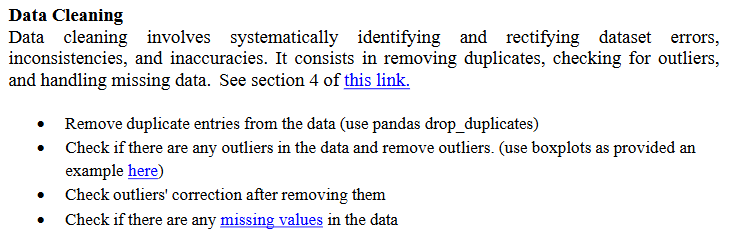

### Remove duplicates

In [255]:
# dataset shape before and after duplicates
print(f"\nInitial dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")
print("Number of duplicates:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {data.shape[0]} rows, {data.shape[1]} columns")


Initial dataset shape: 1030 rows, 9 columns
Number of duplicates: 25
Dataset shape after removing duplicates: 1005 rows, 9 columns


### Remove Outliers


===== boxplots to visualize outliers before removal =====


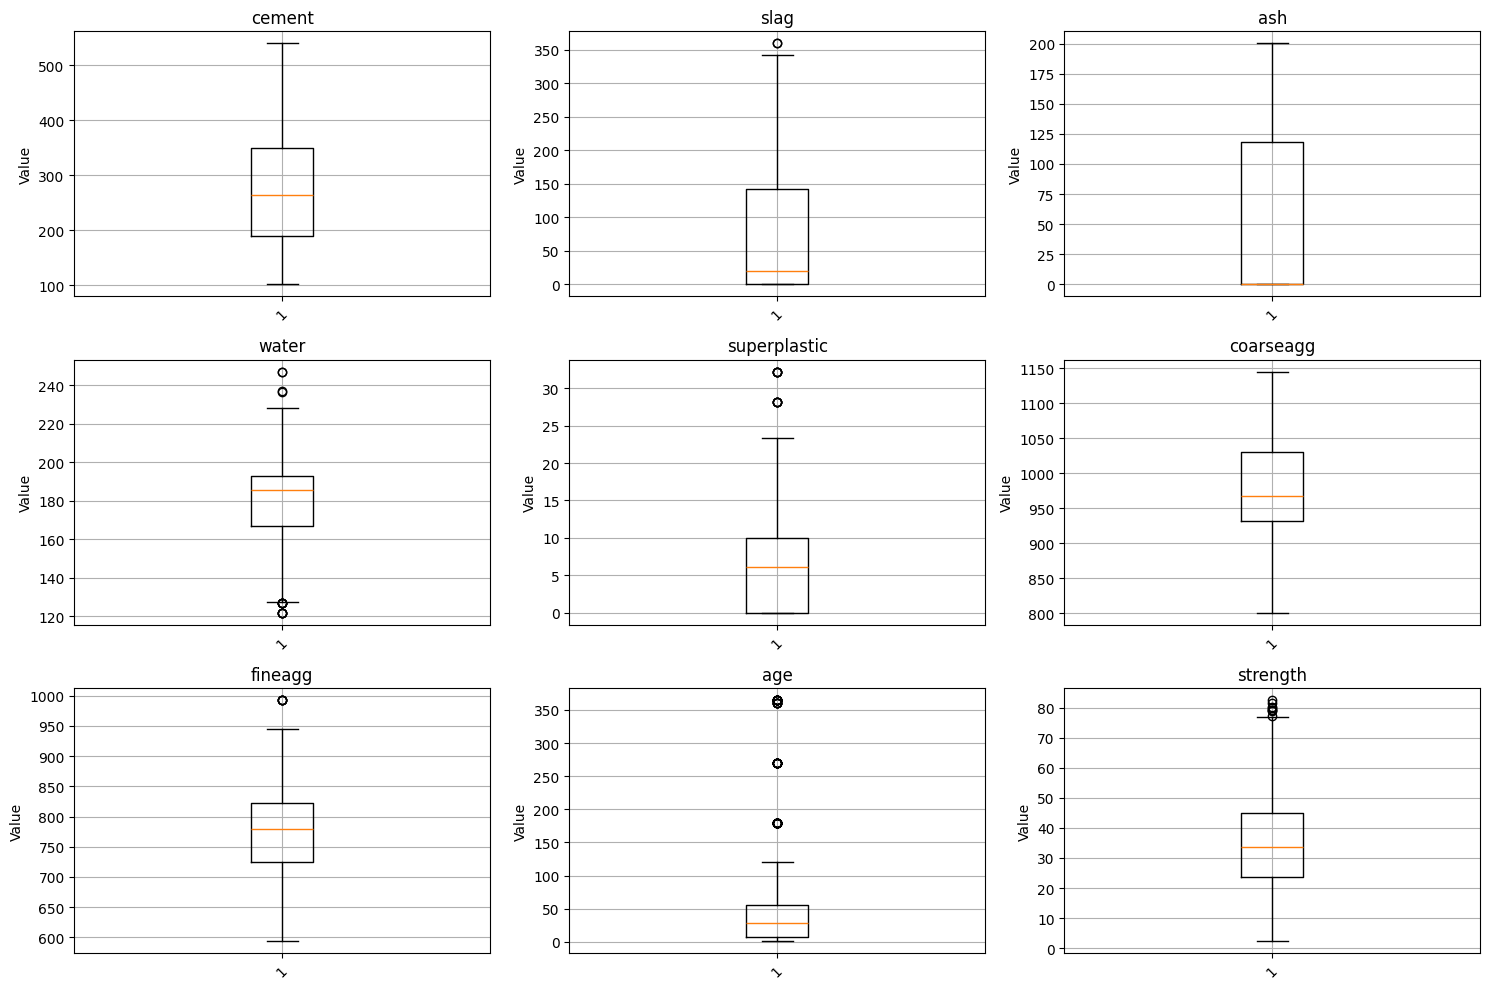

In [256]:
print("\n===== boxplots to visualize outliers before removal =====")
plt.figure(figsize=(15, 10))
col_num = data.shape[1]
for i in range(col_num):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data.iloc[:, i])
    plt.title(data.columns[i])
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()


 ===== Removing outliers based on the IQR method =====
Dataset shape after removing outliers: 911 rows, 9 columns
Number of rows removed as outliers: 94


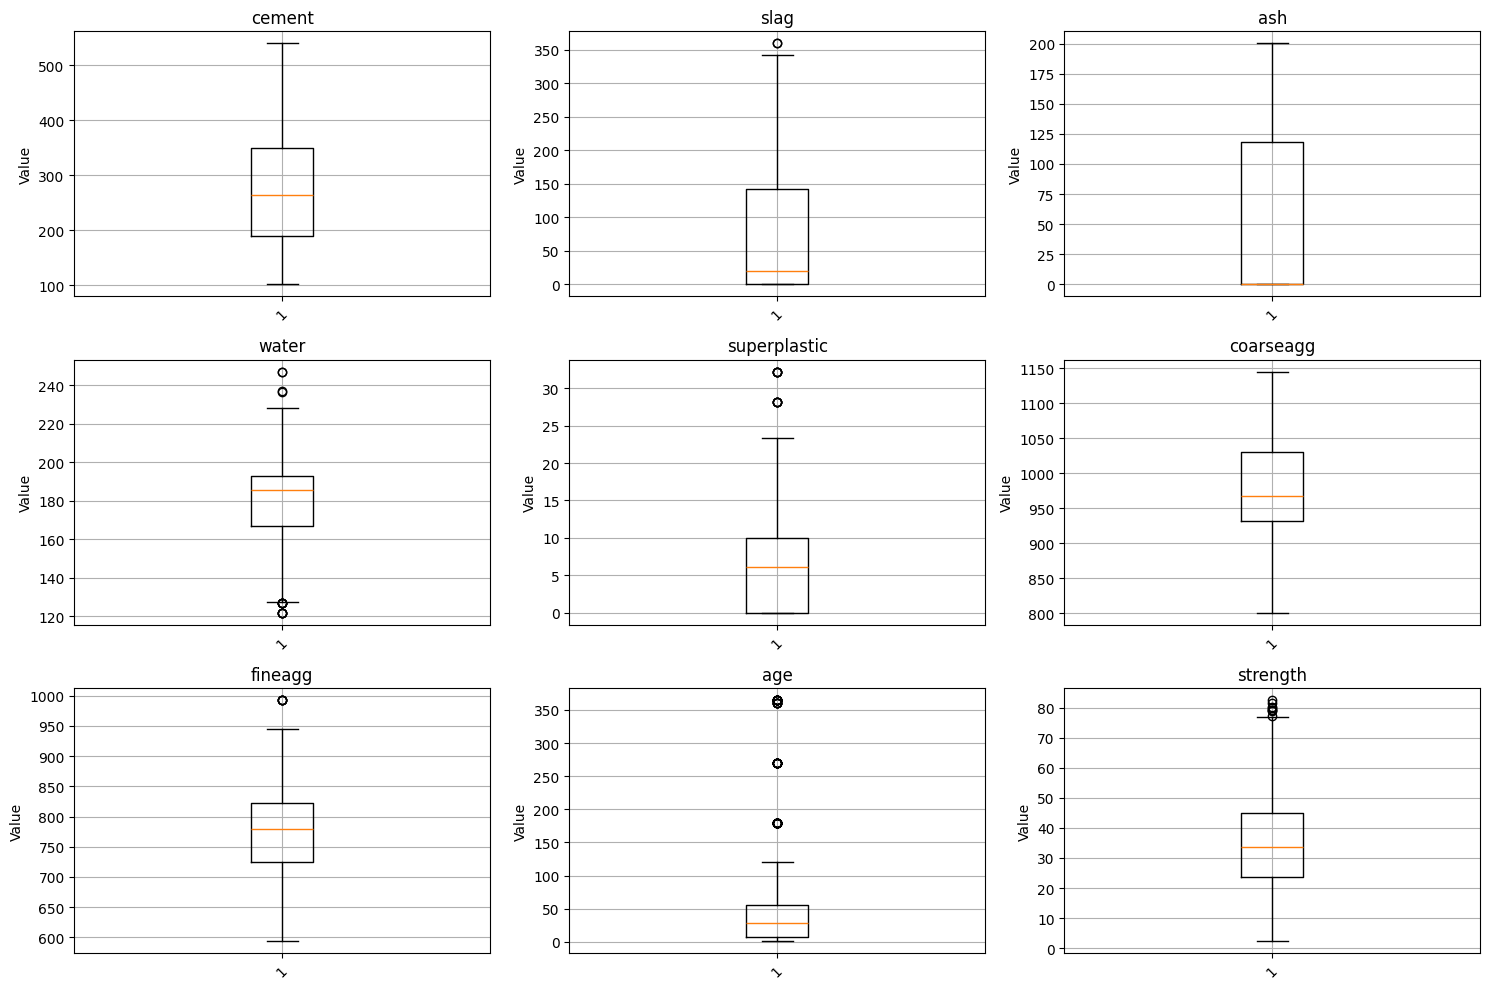

In [257]:
print("\n ===== Removing outliers based on the IQR method =====")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# export the new cleaned data to a new csv
data_cleaned.to_csv('concrete_cleaned.csv', index=False)

print(f"Dataset shape after removing outliers: {data_cleaned.shape[0]} rows, {data_cleaned.shape[1]} columns")
print(f"Number of rows removed as outliers: {data.shape[0] - data_cleaned.shape[0]}")

plt.figure(figsize=(15, 10))
col_num = data.shape[1]
for i in range(col_num):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data.iloc[:, i])
    plt.title(data.columns[i])
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

### Handle missing values

In [258]:
print("Missing values in the cleaned data:")
print(data_cleaned.isnull().sum())

Missing values in the cleaned data:
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


## Exploratory Data Analysis (EDA)

This section performs EDA operations following the Studio 1 instructions

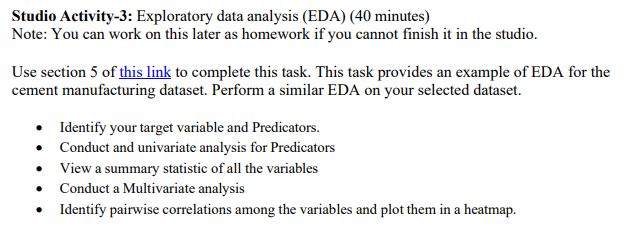

### Target variables and predicators

In [259]:
print("===== Exploratory Data Analysis =====")

# Identify Target and Predictors
target_variable = 'strength'
predictors = data_cleaned.columns.drop(target_variable)

print(f"\nTarget Variable: {target_variable}")
print(f"Predictor Variables: {list(predictors)}")

===== Exploratory Data Analysis =====

Target Variable: strength
Predictor Variables: ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


### Univariate Analysis


 ===== Histograms for Univariate Analysis =====


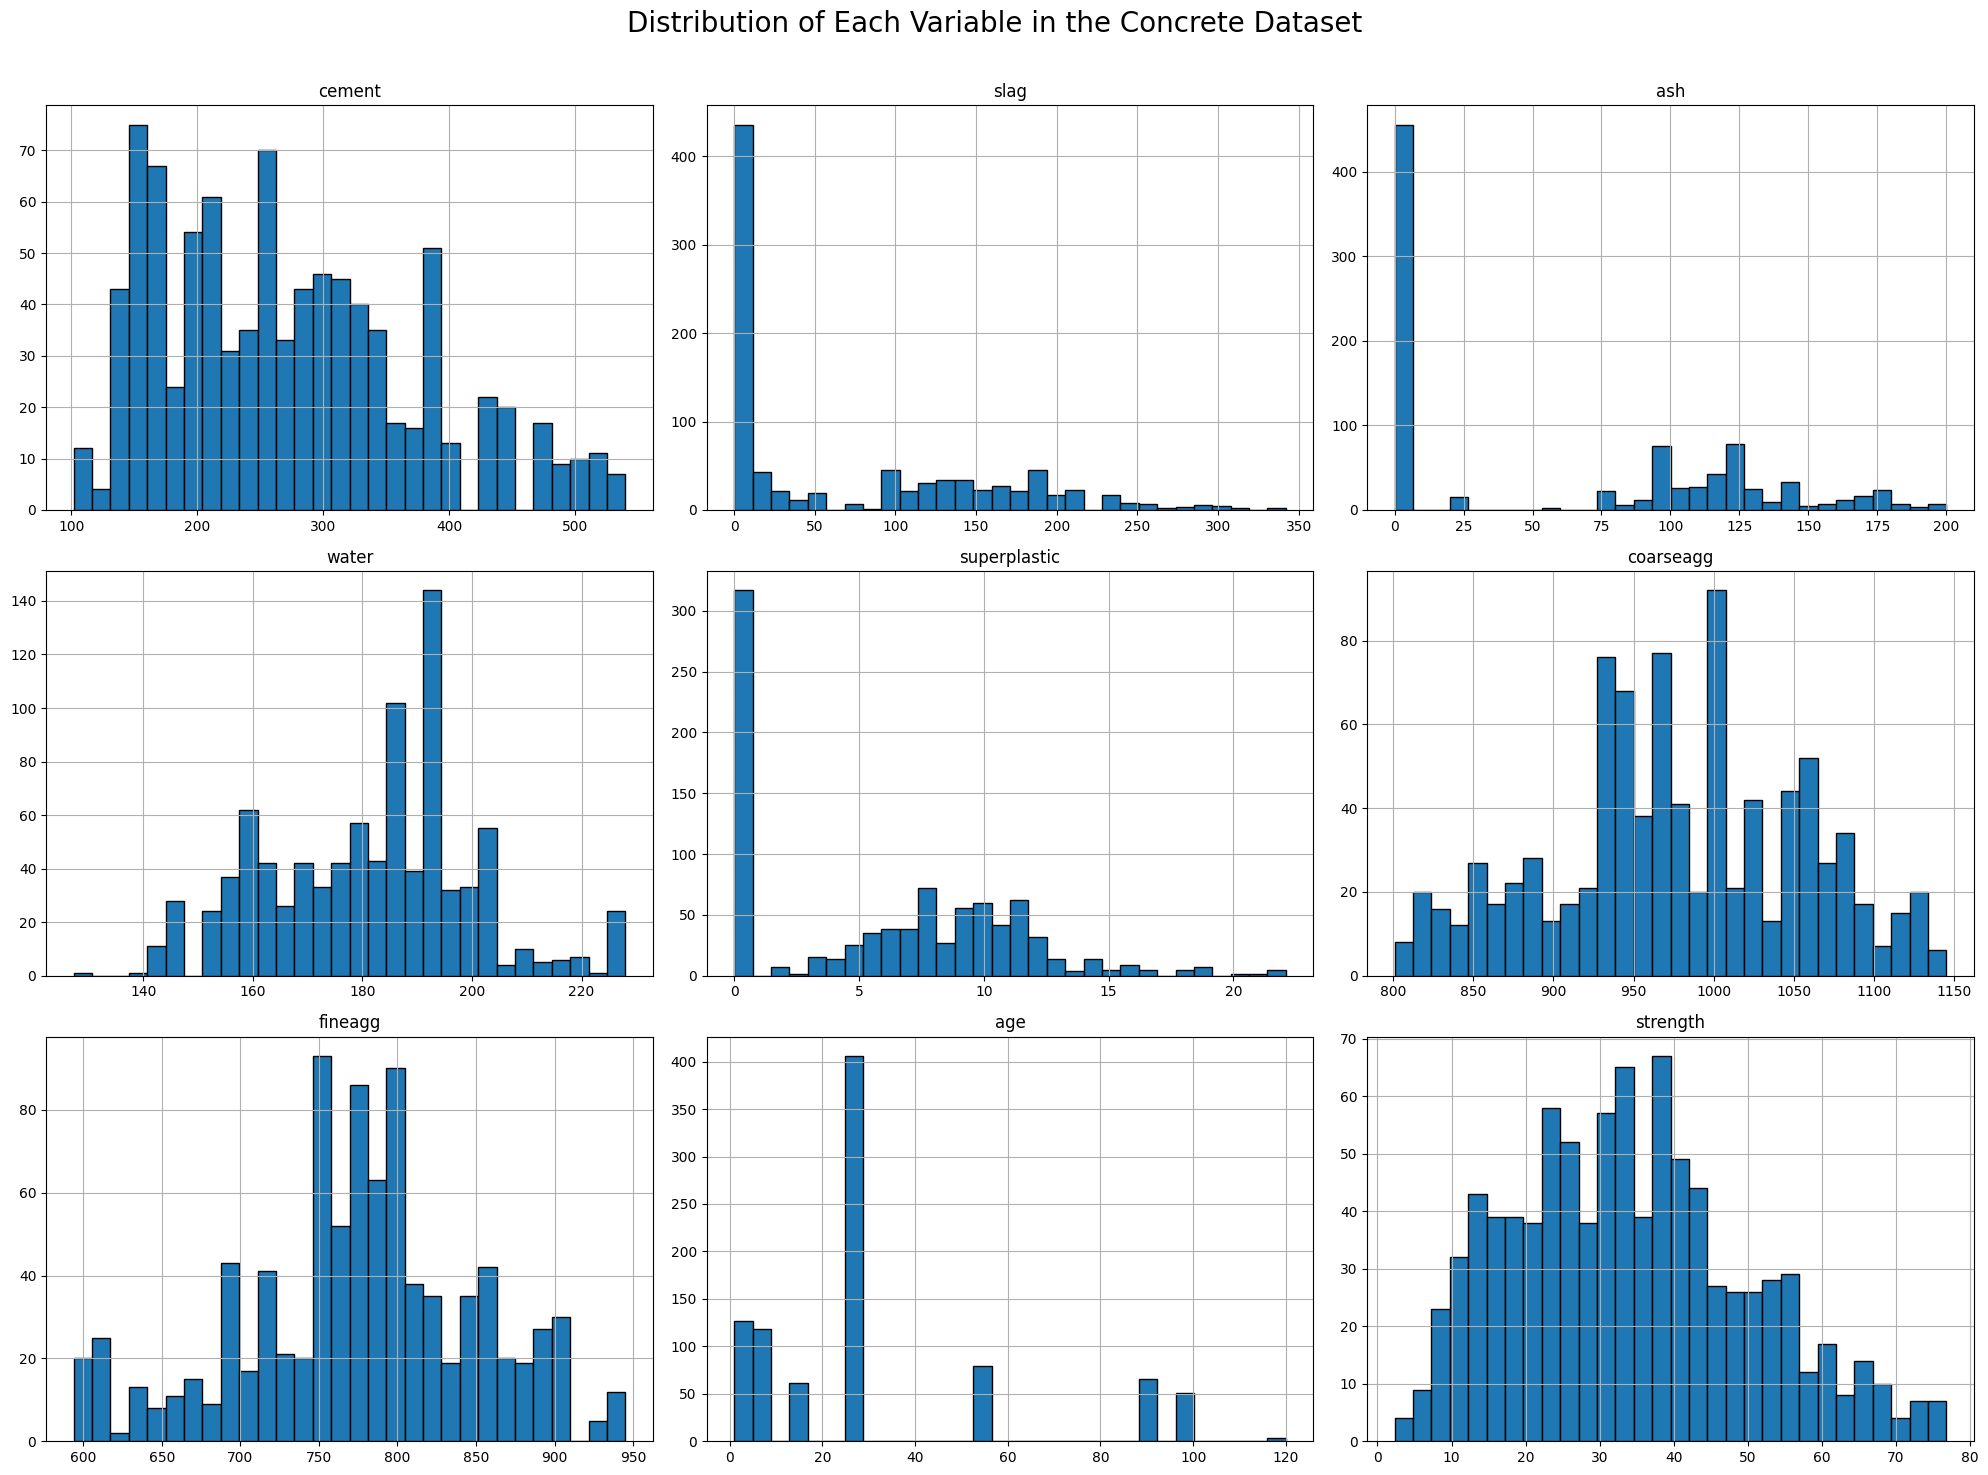

In [260]:
# Univariate Analysis: Generate histograms for each variable
print("\n ===== Histograms for Univariate Analysis =====")
data_cleaned.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Distribution of Each Variable in the Concrete Dataset', size=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Summary statistics

In [261]:
import pandas as pd

print("\n===== Summary Statistics with Median and Skewness =====")
summary_stats = data_cleaned.describe().transpose().round(2)
summary_stats['median'] = data_cleaned.median().round(2)
summary_stats['skew'] = data_cleaned.skew().round(2)

final_columns = ['mean', 'median', 'std', 'min', 'max', 'skew']

print(summary_stats[final_columns])


===== Summary Statistics with Median and Skewness =====
                mean  median     std     min     max  skew
cement        272.27  252.30  101.41  102.00   540.0  0.60
slag           71.44   19.00   86.14    0.00   342.1  0.83
ash            59.93    0.00   64.53    0.00   200.1  0.37
water         181.30  185.00   18.59  127.30   228.0  0.04
superplastic    6.02    6.70    5.24    0.00    22.1  0.30
coarseagg     976.48  971.80   77.58  801.00  1145.0 -0.14
fineagg       775.70  780.10   75.34  594.00   945.0 -0.29
age            32.12   28.00   28.42    1.00   120.0  1.27
strength       34.03   33.06   15.85    2.33    76.8  0.39


### Multivariate Analysis



===== Multivariate Analysis =====


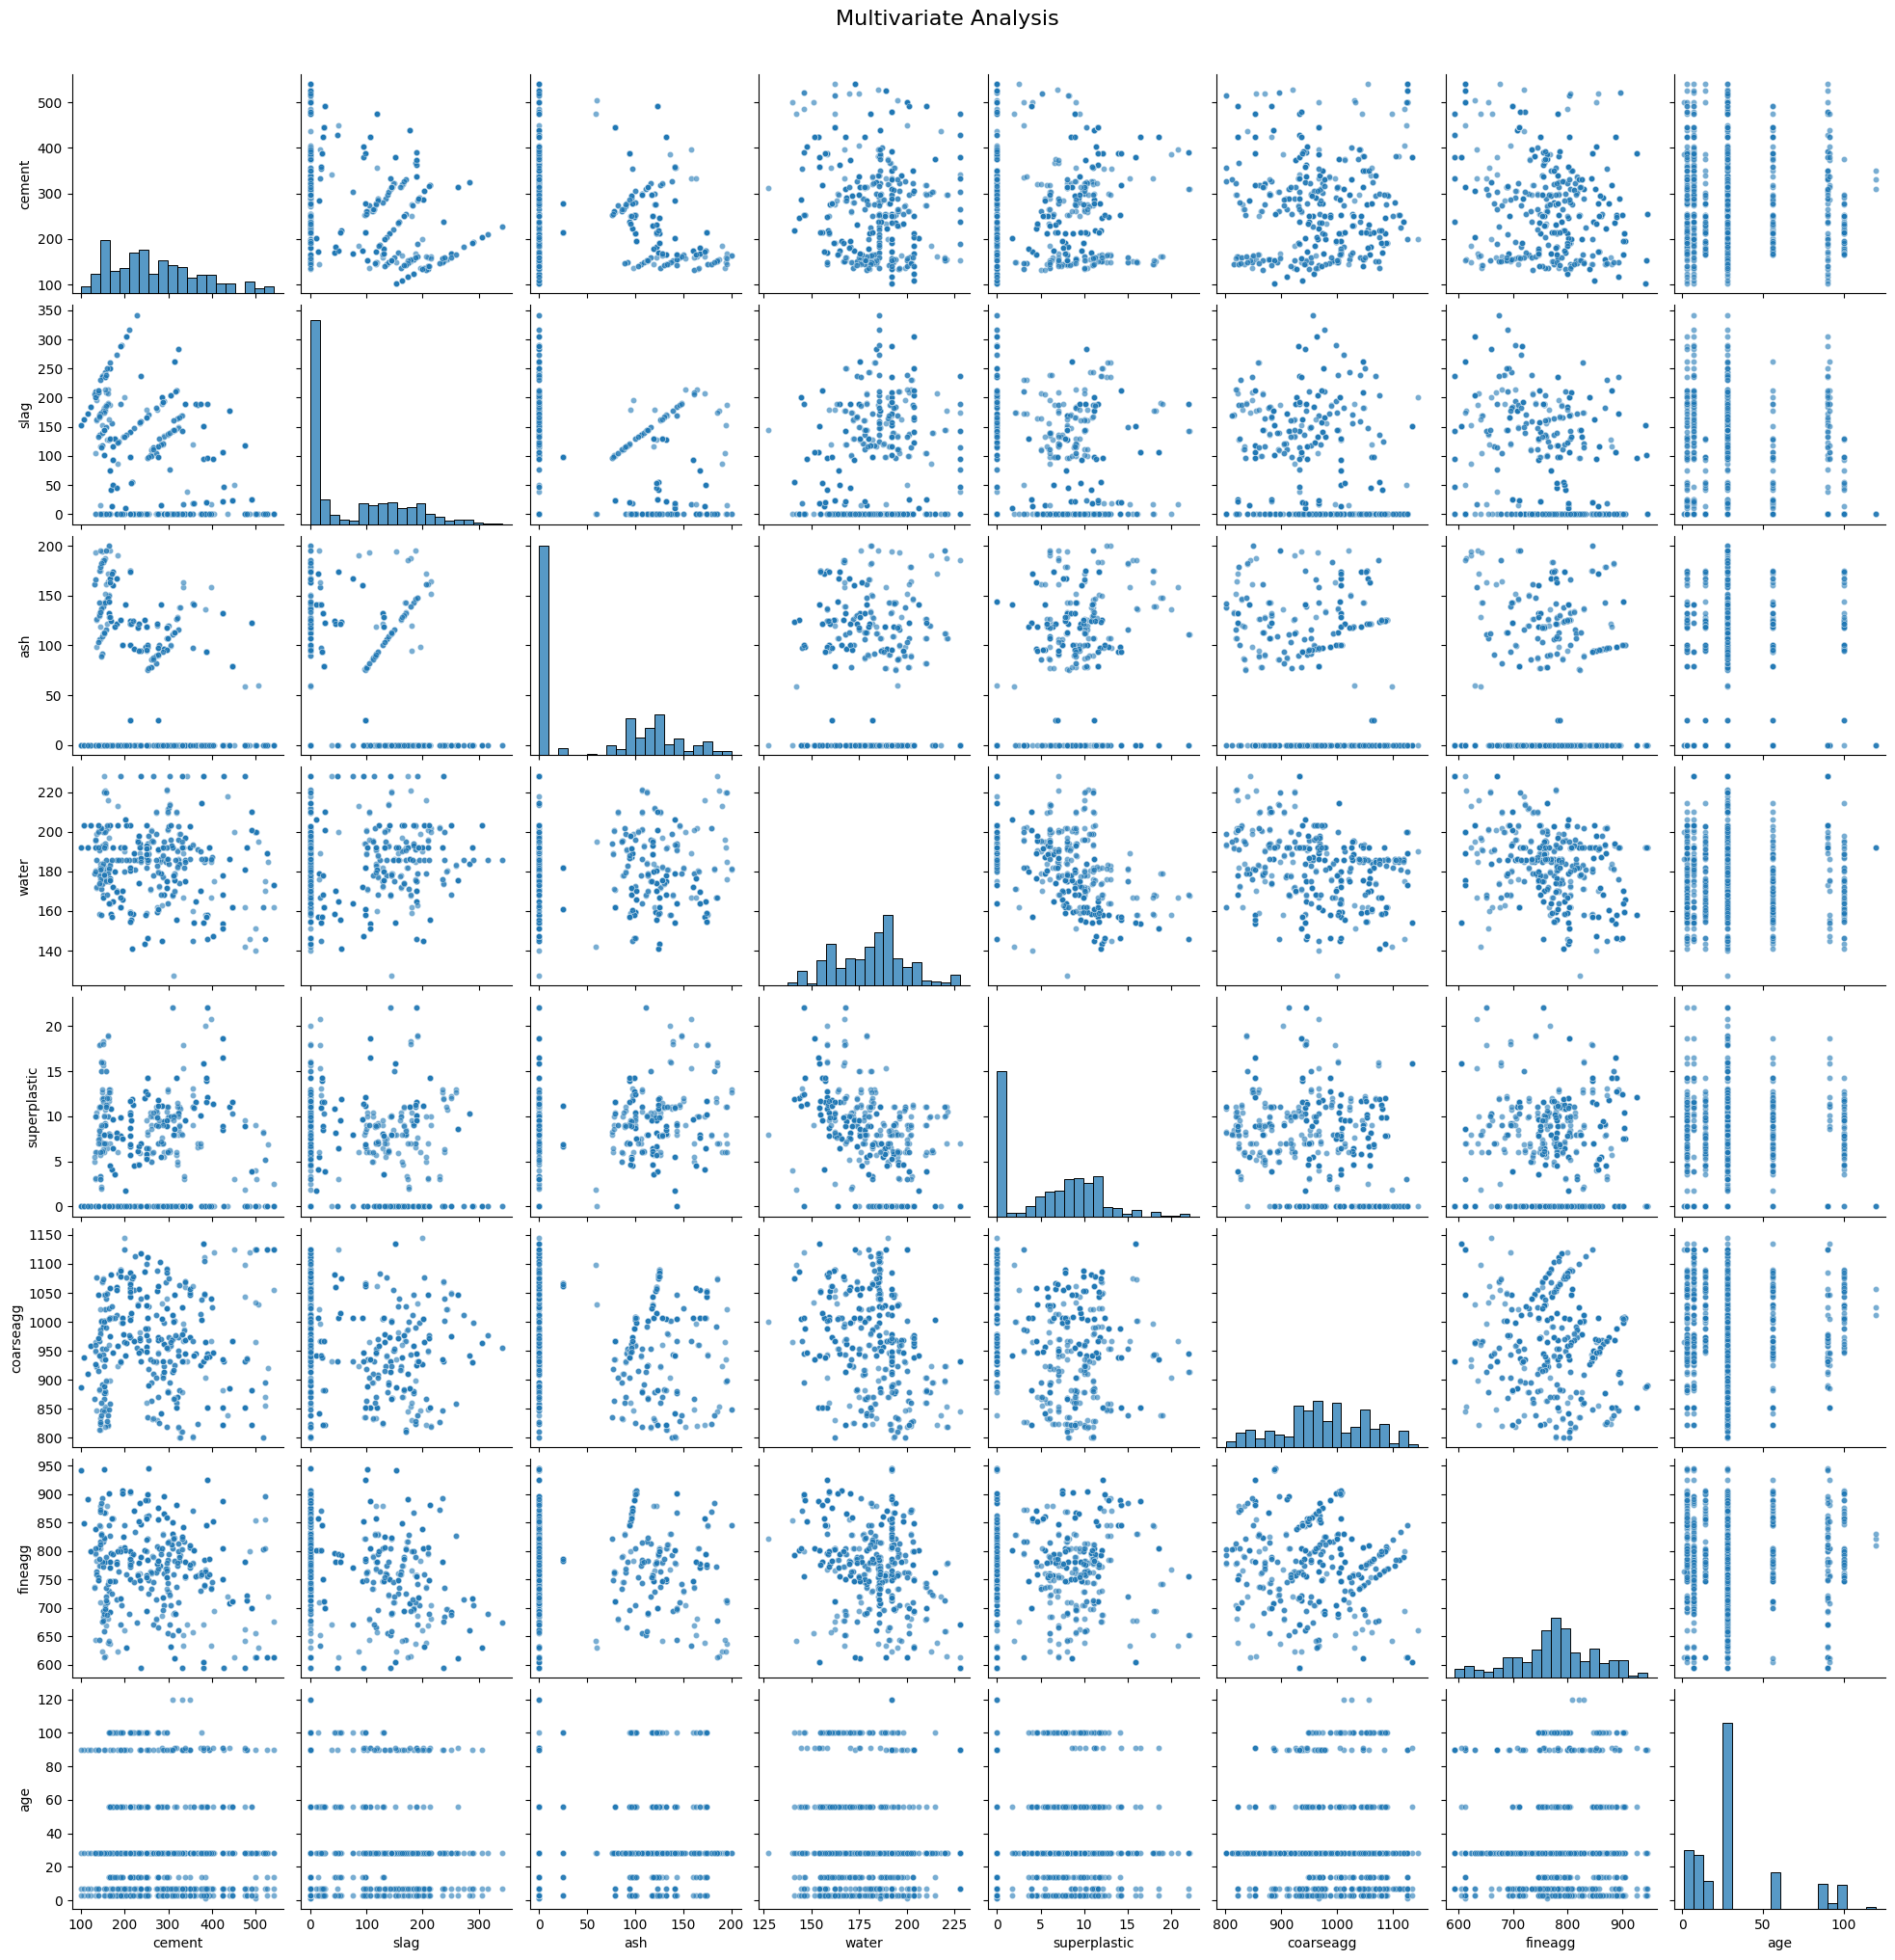

In [262]:
# Multivariate Analysis: Correlation Matrix and Heatmap
print("\n===== Multivariate Analysis =====")
pair_plot = sns.pairplot(data_cleaned[predictors],
                        diag_kind='hist',
                        plot_kws={'alpha': 0.6, 's': 20},
                        diag_kws={'bins': 20})
pair_plot.fig.suptitle('Multivariate Analysis', y=1.02, fontsize=16)
plt.show()


### Pairwise Correlations

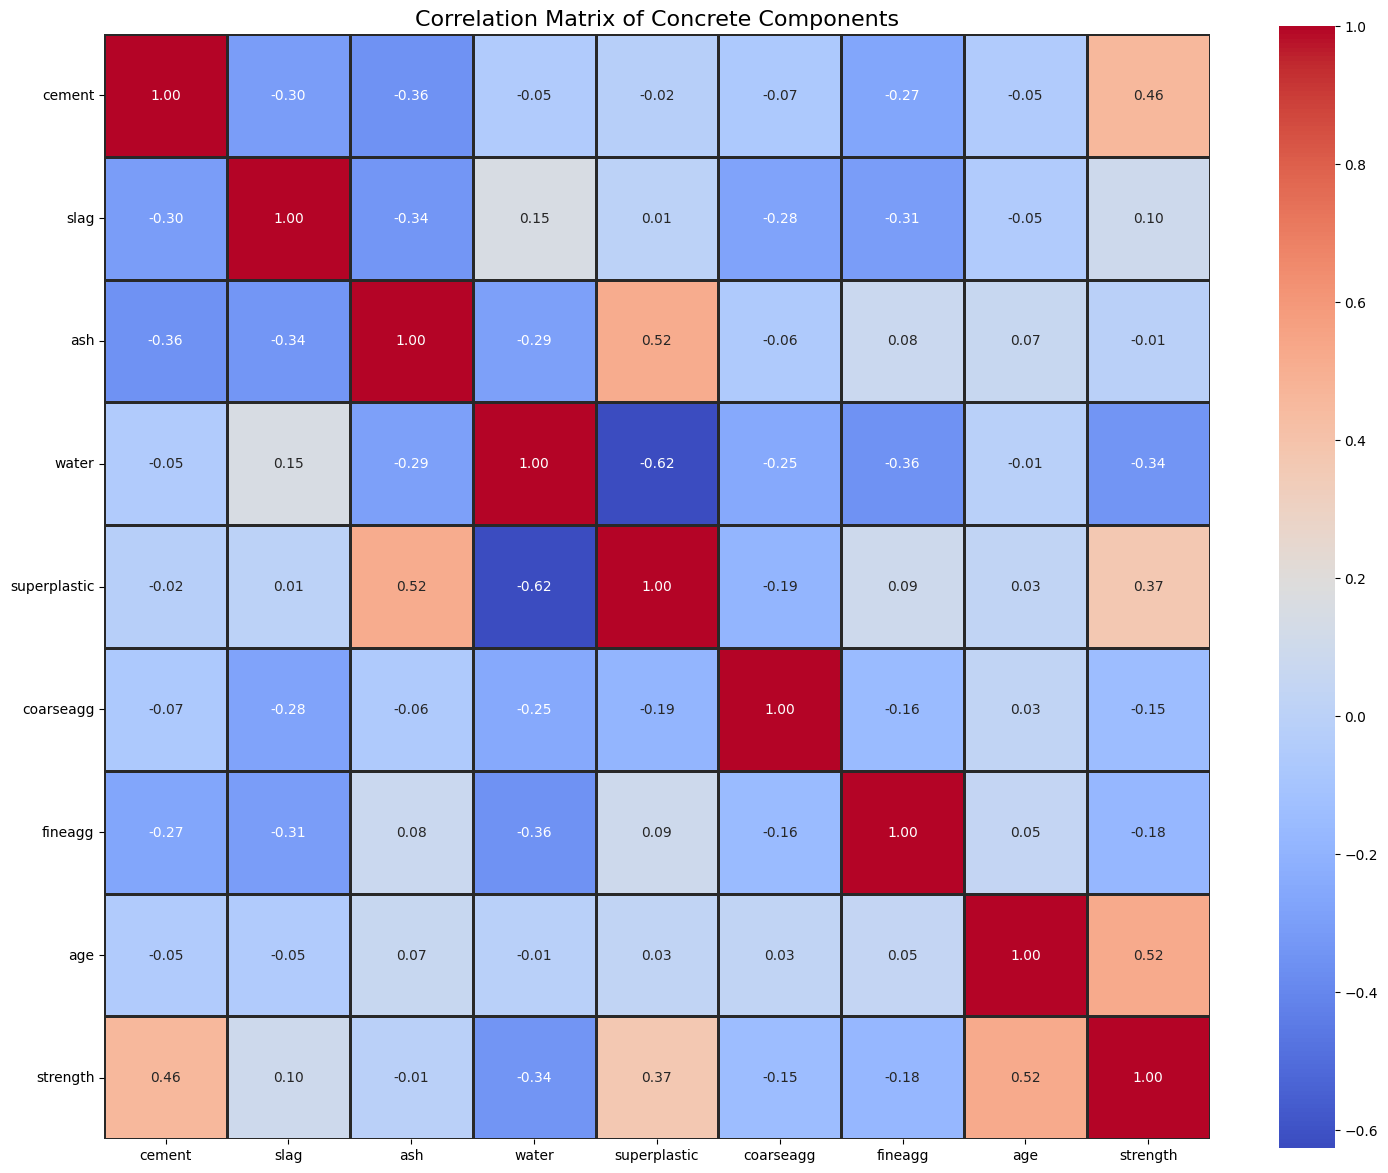


--- Exploratory Data Analysis Complete ---


In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    linecolor="#282828",
    square=True,
)

plt.title("Correlation Matrix of Concrete Components", fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n--- Exploratory Data Analysis Complete ---")

### Class Labelling

This section is from Studio 2, where we need to turn the target variable from numerical to categorical values

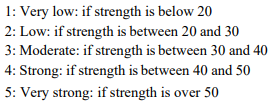

In [264]:
def assign_strength(value):
  if value < 20:
    return 'Very Low'
  elif 20 <= value < 30:
    return 'Low'
  elif 30 <= value < 40:
    return 'Moderate'
  elif 40 <= value < 50:
    return 'Strong'
  else:
    return 'Very Strong'

/tmp/ipython-input-497081102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'strength_class'] = data_cleaned['strength'].apply(assign_strength)


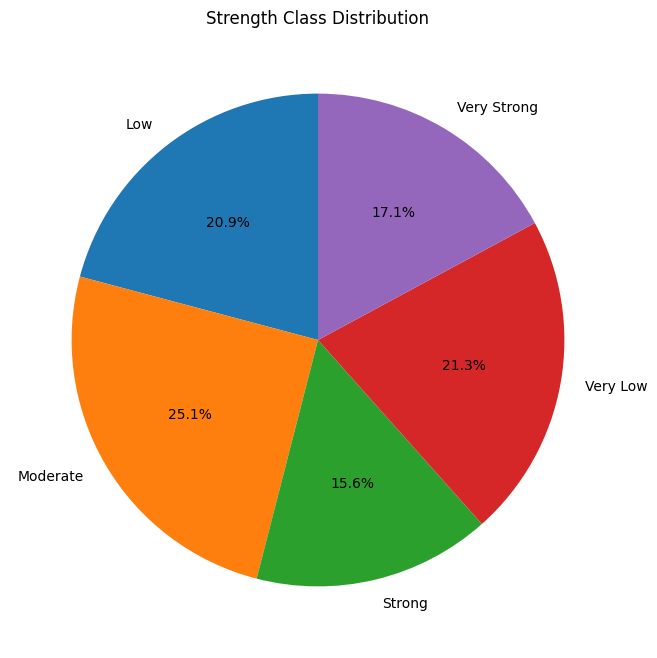

In [265]:
# Select all rows and the column to change the column only
data_cleaned.loc[:, 'strength_class'] = data_cleaned['strength'].apply(assign_strength)

class_counts = data_cleaned['strength_class'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Strength Class Distribution')
plt.show()

## Feature Engineering and Feature Selection

This section preprocesses the cleaned data and choose a feature for later model development

In [266]:
### Simplifying age to categorical
print("Unique age values:", len(data_cleaned['age'].unique()))
print("Age values:", sorted(data_cleaned['age'].unique()))

Unique age values: 10
Age values: [np.int64(1), np.int64(3), np.int64(7), np.int64(14), np.int64(28), np.int64(56), np.int64(90), np.int64(91), np.int64(100), np.int64(120)]


In [267]:
age_mapping = {age: idx+1 for idx, age in enumerate(sorted(data_cleaned['age'].unique()))}
data_cleaned.loc[:, 'age_categorical'] = data_cleaned['age'].map(age_mapping)

print("Age mapping:", age_mapping)
display(data_cleaned.head(5))

Age mapping: {np.int64(1): 1, np.int64(3): 2, np.int64(7): 3, np.int64(14): 4, np.int64(28): 5, np.int64(56): 6, np.int64(90): 7, np.int64(91): 8, np.int64(100): 9, np.int64(120): 10}


/tmp/ipython-input-1260479701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'age_categorical'] = data_cleaned['age'].map(age_mapping)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_class,age_categorical
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,Low,5
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,Low,4
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,Low,5
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Strong,5
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,Very Low,5


### Normalize other features

In [268]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']
scaler = MinMaxScaler()
concrete_normalized = data_cleaned.copy()
concrete_normalized[features_to_scale] = scaler.fit_transform(data_cleaned[features_to_scale])
print("Normalization complete.")
concrete_normalized.to_csv('concrete_normalized.csv', index=False)


Normalization complete.


### Create compact features

In [269]:
data_normalized = data_cleaned.copy()
data_normalized['cement_slag'] = data_normalized['cement'] * data_normalized['slag']
data_normalized['cement_ash'] = data_normalized['cement'] * data_normalized['ash']
data_normalized['water_fineagg'] = data_normalized['water'] * data_normalized['fineagg']
data_normalized['ash_superplastic'] = data_normalized['ash'] * data_normalized['superplastic']
print("Composite features created.")

Composite features created.


In [270]:
mapping = {'Very Low': 1, 'Low': 2, 'Moderate': 3, 'Strong': 4, 'Very Strong': 5}
data_normalized['class_label'] = data_cleaned['strength_class'].map(mapping)

features_columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
                   'cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic', 'class_label']

features_concrete = data_normalized[features_columns]

### Feature Selection

In [271]:
selected_features = ['cement', 'water', 'superplastic', 'age', 'class_label']
selected_feature_concrete = features_concrete[selected_features]

## Model Development

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [273]:
# target variable
y = data_cleaned['strength_class']

# ===== 5 Feature Sets =====

# FS1: All original numerical features
X1 = data_cleaned[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']]
feature_set_1_name = "All Original Features"

# FS2: Features with the highest correlation to strength from EDA
X2 = data_cleaned[['cement', 'superplastic', 'age']]
feature_set_2_name = "Highest Correlation Features"

# FS3: All features including the engineered 'age_categorical'
X3 = data_cleaned[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age_categorical']]
feature_set_3_name = "All Features with Age Categorical"

# FS4: Reduced set of features based on engineering judgement
# Exclude 'slag' and 'ash' as they often contain zero values.
X4 = data_cleaned[['cement', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']]
feature_set_4_name = "Reduced Features (No Slag/Ash)"

# FS5: Features selected from the Feature Selection step
X5 = selected_feature_concrete.drop(columns=['class_label'])
feature_set_5_name = "Selected Features from Feature Selection"

feature_sets = [(X1, feature_set_1_name),
                (X2, feature_set_2_name),
                (X3, feature_set_3_name),
                (X4, feature_set_4_name),
                (X5, feature_set_5_name)]

results = []

In [274]:
for X, name in feature_sets:
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy and store
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Feature Set': name, 'Accuracy': accuracy, 'Number of Features': X.shape[1]})

In [275]:
results_df = pd.DataFrame(results)
print("===== Final Comparison Table =====")
print(results_df.to_string(index=False))

===== Final Comparison Table =====
                             Feature Set  Accuracy  Number of Features
                   All Original Features  0.624088                   8
            Highest Correlation Features  0.609489                   3
       All Features with Age Categorical  0.624088                   8
          Reduced Features (No Slag/Ash)  0.587591                   6
Selected Features from Feature Selection  0.558394                   4
